# PRÁCTICA 1: REDES NEURONALES RECURRENTES PARA SERIES TEMPORALES

# Integrantes:

- Paloma Moya
- Lydia Sanchez-Cano
- Sofía Peña

## **Introducción**

Las redes neuronales son una herramienta muy útil para la optimización de procesos computacionales. Es importante saber elegir qué tipo utilizar en cada proceso específico. Debido en el caso dado se trata de una base de datos extensa con información recogida de manera temporal y el orden de la introducción es relevante para su estudio, la mejor elección es el uso de las Redes Neuronales Recurrentes.

A lo largo de este documento se probarán diferentes configuraciones de los parámetros con el fin de reducir los errores de los algorítmos por debajo de la línea base, es decir, poder concluir que la utilización de un algoritmo de Aprendizaje Autmático es una mejor opción comparado con la implementación de un algoritmo basado en el sentido común.

## **Enunciados**


* **Ajustar la cantidad de unidades en cada capa recurrente en la configuración apilada, así como la cantidad de dropout**. Las elecciones actuales son en gran medida arbitrarias y, por lo tanto, probablemente subóptimas.
* **Ajustar la tasa de aprendizaje utilizada por el optimizador ``RMSprop``** o **probad con un optimizador diferente**.
* Intentar **utilizar una pila de capas ``Dense`` como regresor encima de la capa recurrente, en lugar de una única capa ``Dense``**.
* **Mejorar la entrada al modelo**: **intentar usar secuencias más largas o más cortas o una tasa de muestreo diferente, o comenzar a hacer ingeniería de características**.

## **Resolución**

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Carga de base de datos

In [ ]:
import pandas as pd
# Cargar la base de datos en un DataFrame de Pandas
df = pd.read_csv('jena_climate_2009_2016.csv')
# Mostrar las primeras filas de la base de datos para tener una idea de su estructura
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


### **Preparación de la base de datos**

In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    # Guardamos columna 1 en el array temperatura
    temperature[i] = values[1]
    # Guardamos todas las columnas (temperatura
    # incluida) en el array raw_data
    raw_data[i, :] = values[:]

Este código procesa un conjunto de datos estructurados en líneas, extrayendo valores numéricos de cada línea (excepto el primer valor), almacena los valores de temperatura en un array separado y todos los valores (incluida la temperatura) en un array de datos sin la primera columna de los datos originales.

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


El código imprime la cantidad de muestras en cada conjunto, lo que proporciona una verificación clara de la distribución de los datos.

### **Normalización de los datos**

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

### **División de la base de datos: Entrenamiento, Validación y Prueba**

In [ ]:
import numpy as np
from tensorflow import keras
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

### **Modelos**

**1. Modelo sin usar machine-learning**

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        # La característica 'temperatura' está en la columna 1,
        # por lo que samples[:, -1, 1] es la última medición de
        # temperatura en la secuencia de entrada. Recordad que
        # normalizamos nuestras características, por lo que para
        # recuperar una temperatura en grados Celsius, debemos
        # desnormalizarla multiplicándola por la desviación
        # estándar y sumando nuevamente la media.
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


La función **evaluate_naive_method** toma un conjunto de datos y calcula el error absoluto medio (MAE). Este método simplemente predice la última medición de temperatura en cada secuencia de entrada, después de desnormalizarla. Calcula la suma total de los errores absolutos entre estas predicciones y los objetivos reales, y luego divide esta suma por el número total de muestras observadas para obtener el MAE. Finalmente, imprime el MAE de validación y el MAE de prueba utilizando conjuntos de datos de validación y prueba respectivamente.

**2. Modelo con Machine Learning**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Definición del modelo usando la API funcional de Keras para mayor flexibilidad
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# Capa Flatten:....
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu")(x)
# Capa de salida: Se mantiene igual, una capa densa para la predicción final
outputs = layers.Dense(1)(x)

# Construcción del modelo: Se mantiene igual
model = keras.Model(inputs, outputs)

# Callbacks: Aquí se añade EarlyStopping junto con ModelCheckpoint
# ModelCheckpoint guarda el mejor modelo basado en la validación del loss
# EarlyStopping detiene el entrenamiento cuando el 'val_loss' deja de mejorar, previniendo sobreajuste
callbacks = [
    ModelCheckpoint("jena_dense.keras", save_best_only=True)]

# Compilación del modelo: Se mantiene igual
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Entrenamiento del modelo: Se mantiene igual
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)
model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 56s 66ms/step - loss: 13.3068 - mae: 2.8143 - val_loss: 9.9683 - val_mae: 2.4850
Epoch 2/10
819/819 [==============================] - 53s 64ms/step - loss: 8.8459 - mae: 2.3327 - val_loss: 11.4816 - val_mae: 2.6754
Epoch 3/10
819/819 [==============================] - 54s 65ms/step - loss: 7.7131 - mae: 2.1771 - val_loss: 10.6476 - val_mae: 2.5898
Epoch 4/10
819/819 [==============================] - 48s 58ms/step - loss: 6.9163 - mae: 2.0628 - val_loss: 10.4607 - val_mae: 2.5606
Epoch 5/10
819/819 [==============================] - 52s 64ms/step - loss: 6.3756 - mae: 1.9843 - val_loss: 10.8518 - val_mae: 2.5961
Epoch 6/10
819/819 [==============================] - 47s 57ms/step - loss: 5.9601 - mae: 1.9192 - val_loss: 11.9583 - val_mae: 2.7450
Epoch 7/10
819/819 [==============================] - 49s 59ms/step - loss: 5.5768 - mae: 1.8570 - val_loss: 13.4185 - val_mae: 2.9207
Epoch 8/10
819/819 [==============================] - 4

Utilizar RNN  no merece la pena debido a que debido a partir de los conocimientos y las pruebas realizadas no parece mejorar la línea base.

Para una posible mejora, podría aumentar las epochs dado que este tipo de neuronas necesita un mayor tiempo de procesamiento.

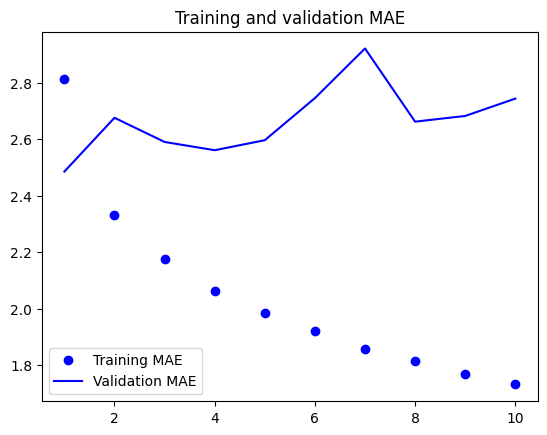

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

Se observa que el MAE del entrenamiento disminuye con el tiempo, lo cual es esperado a medida que el modelo se ajusta a los datos de entrenamiento. Sin embargo, el MAE de validación no sigue una tendencia descendente tan clara y presenta variabilidad, sugiriendo que el modelo podría no estar generalizando bien a datos nuevos.

**Modelo convolucional 1D**

In [ ]:
# Define el modelo
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(16, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(32, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(64, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.2)(x)  # Agregar Dropout para regularización
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Compilar el modelo
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Ajustar la tasa de aprendizaje
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Entrenar el modelo
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras", save_best_only=True)
]
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

# Evaluar el modelo
model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 104s 125ms/step - loss: 20.6162 - mae: 3.5406 - val_loss: 15.3841 - val_mae: 3.1218
Epoch 2/10
819/819 [==============================] - 99s 121ms/step - loss: 13.5031 - mae: 2.8891 - val_loss: 15.9234 - val_mae: 3.1656
Epoch 3/10
819/819 [==============================] - 99s 121ms/step - loss: 11.4434 - mae: 2.6505 - val_loss: 16.0561 - val_mae: 3.1778
Epoch 4/10
819/819 [==============================] - 99s 120ms/step - loss: 10.1988 - mae: 2.4996 - val_loss: 16.8491 - val_mae: 3.2490
Epoch 5/10
819/819 [==============================] - 99s 121ms/step - loss: 9.4441 - mae: 2.4005 - val_loss: 16.8701 - val_mae: 3.2397
Epoch 6/10
819/819 [==============================] - 100s 122ms/step - loss: 8.8115 - mae: 2.3119 - val_loss: 16.6798 - val_mae: 3.2118
Epoch 7/10
819/819 [==============================] - 120s 146ms/step - loss: 8.4815 - mae: 2.2664 - val_loss: 18.9069 - val_mae: 3.4491
Epoch 8/10
819/819 [=====================

Este modelo mejora con respecto al modelo anterior. Esto sugiere que el primer modelo tiene un mejor rendimiento en la tarea de predicción de datos climáticos en comparación con el segundo modelo.


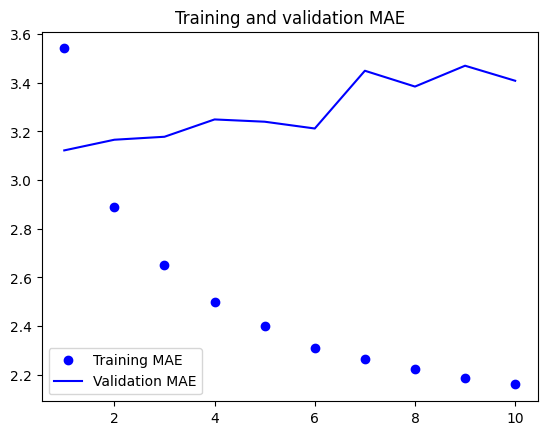

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

Se puede observar que el MAE de entrenamiento comienza alto y disminuye gradualmente, lo que es una señal de que el modelo está aprendiendo. Sin embargo, el MAE de validación comienza más bajo que el de entrenamiento, sube ligeramente y después se mantiene relativamente constante, aunque con un ligero incremento hacia las últimas épocas.

Este comportamiento puede sugerir que el modelo no mejora su capacidad de generalización después de cierto punto, lo que podría ser un indicio de sobreajuste, especialmente si el MAE de entrenamiento sigue disminuyendo mientras que el de validación no. También podría ser que el modelo haya alcanzado su capacidad de aprendizaje con la arquitectura y los datos actuales

**Modelo básico recurrente**

In [ ]:

# Define el modelo
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs)  # Aumentar el tamaño de la capa LSTM
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Compilar el modelo
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)  # Ajustar la tasa de aprendizaje
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

# Entrenar el modelo
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras", save_best_only=True)
]
history = model.fit(train_dataset, epochs=15, validation_data=val_dataset, callbacks=callbacks)  # Aumentar las épocas de entrenamiento

# Evaluar el modelo
model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/15
819/819 [==============================] - 165s 197ms/step - loss: 20.0062 - mae: 3.2357 - val_loss: 9.2840 - val_mae: 2.3592
Epoch 2/15
819/819 [==============================] - 153s 187ms/step - loss: 8.9821 - mae: 2.3348 - val_loss: 9.3540 - val_mae: 2.3780
Epoch 3/15
819/819 [==============================] - 160s 195ms/step - loss: 7.9507 - mae: 2.1969 - val_loss: 10.7108 - val_mae: 2.5445
Epoch 4/15
819/819 [==============================] - 171s 209ms/step - loss: 7.3508 - mae: 2.1119 - val_loss: 10.2681 - val_mae: 2.4974
Epoch 5/15
819/819 [==============================] - 164s 200ms/step - loss: 6.8544 - mae: 2.0382 - val_loss: 10.4956 - val_mae: 2.5171
Epoch 6/15
819/819 [==============================] - 152s 185ms/step - loss: 6.4136 - mae: 1.9688 - val_loss: 10.3990 - val_mae: 2.5172
Epoch 7/15
819/819 [==============================] - 147s 179ms/step - loss: 6.0710 - mae: 1.9144 - val_loss: 11.3210 - val_mae: 2.6095
Epoch 8/15
819/819 [======================

En comparación con los otros dos modelos, este tiene mejores resultados. Tiene una mayor precisión en sus predicciones con respecto a los modelos anteriores.

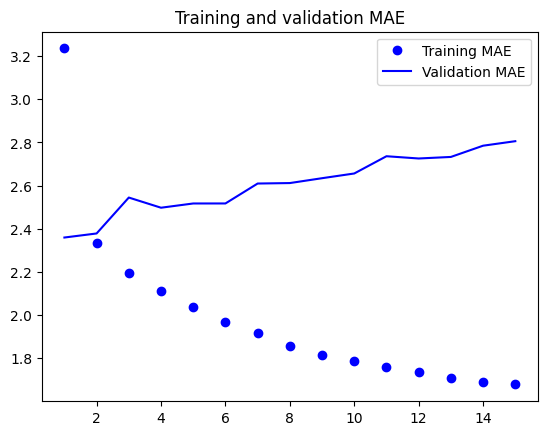

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

El gráfico muestra que el MAE de entrenamiento disminuye constantemente a medida que avanza el número de épocas, lo cual indica que el modelo está aprendiendo y mejorando su rendimiento en los datos de entrenamiento. Por otro lado, el MAE de validación comienza más alto, disminuye levemente y luego parece estabilizarse sin una tendencia clara de mejora o empeoramiento.

**Entendiendo las redes neuronales recurrentes (RNN)**

**Implementación de una RNN simple basado en NumPy**

In [ ]:
import numpy as np
# Número de timesteps en la secuencia de entrada
timesteps = 100
# Dimensionalidad del espacio de características de entrada
input_features = 32
# Dimensionalidad del espacio de características de salida
output_features = 64
# Datos de entrada: ruido aleatorio para mejorar el ejemplo
inputs = np.random.random((timesteps, input_features))
# Estado inicial: un vector de ceros
state_t = np.zeros((output_features,))
# Creamos matrices de pesos aleatorios
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
# input_t es un vector con la forma (input_features,)
for input_t in inputs:
  # Combina la entrada con el estado actual (la salida anterior)
  # para obtener la salida actual. Usamos tanh para agregar no
  # linealidad (podríamos usar cualquier otra función de activación).
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  # Almacena la salida en una lista
  successive_outputs.append(output_t)
  # Actualiza el estado de la red para el próximo timestep
  state_t = output_t
# El resultado final es un tensor de
# rango 2 con la forma (timesteps, output_features)
final_output_sequence = np.stack(successive_outputs, axis=0)

**Una capa recurrente en Keras**

**Apilando capas RNN SimpleRNN con dropout para sobreentrenamiento**

SimpleRNN es un tipo de modelo de RNN que no es muy preciso a la hora de utilizarlos para bases de datos con muchos datos. Tiende a olvidar información anterior y tienda a la inestabilidad de entrenamiento.

Debido a que la base de datos utilizada es muy extensa y la debido tamién al gran coste que requiere ejecutarlo, se va a proceder a construir los modelos para LSTM y GRU.

**Apilando capas RNN LSTM con dropout para sobreentrenamiento**

**1. DROPOUT RECURRENTE**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Definición del modelo usando la API funcional de Keras para mayor flexibilidad
inputs = Input(shape=(sequence_length, raw_data.shape[-1]))

# Capa LSTM con Dropout recurrente
# recurrent_dropout ayuda a prevenir el sobreajuste en las dependencias temporales de los datos
x = LSTM(32, recurrent_dropout=0.25, return_sequences=False)(inputs)

# Capa de Dropout: Ayuda a prevenir el sobreajuste reduciendo la dependencia en ciertas unidades
# "apagando" algunas de ellas aleatoriamente durante el entrenamiento
x = Dropout(0.5)(x)

# Capa de salida: Capa densa para la predicción final
outputs = Dense(1)(x)

# Construcción del modelo
model = Model(inputs, outputs)

# Callbacks: Se añade EarlyStopping junto con ModelCheckpoint
# ModelCheckpoint guarda el mejor modelo basado en la validación del loss
# EarlyStopping detiene el entrenamiento cuando el 'val_loss' deja de mejorar, previniendo sobreajuste
callbacks = [
    ModelCheckpoint("jena_lstm_dropout.keras", save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Añadido para detener el entrenamiento temprano
]

# Compilación del modelo
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Entrenamiento del modelo
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset, callbacks=callbacks)
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Epoch 1/5
819/819 [==============================] - 217s 261ms/step - loss: 27.1803 - mae: 3.8414 - val_loss: 9.8618 - val_mae: 2.4516
Epoch 2/5
819/819 [==============================] - 235s 286ms/step - loss: 14.7787 - mae: 2.9889 - val_loss: 9.5495 - val_mae: 2.4210
Epoch 3/5
819/819 [==============================] - 231s 282ms/step - loss: 14.0575 - mae: 2.9056 - val_loss: 9.4651 - val_mae: 2.4043
Epoch 4/5
819/819 [==============================] - 218s 266ms/step - loss: 13.6772 - mae: 2.8627 - val_loss: 9.2558 - val_mae: 2.3717
Epoch 5/5
405/405 [==============================] - 31s 76ms/step - loss: 10.3393 - mae: 2.5381
Test MAE: 2.54


Se obtiene una leve mejora con respecto al modelo visto en clase. De aumentar las epochs a las mismas que se proponen en el cuaderno de clase, se obtiene  un MAE muy inferior.

Como se ha comentado anteriormente, debido al grn número de datos de la base de datos, el modelo entrena muy despacio por lo que o se reduce el dataset y se aumentan las epochs o se deja como está y se aumentan o disminuyen las epochs según requiera el modelo.

En este caso, se ha optado por mantener el dataset y establecer solo 5 epochs.

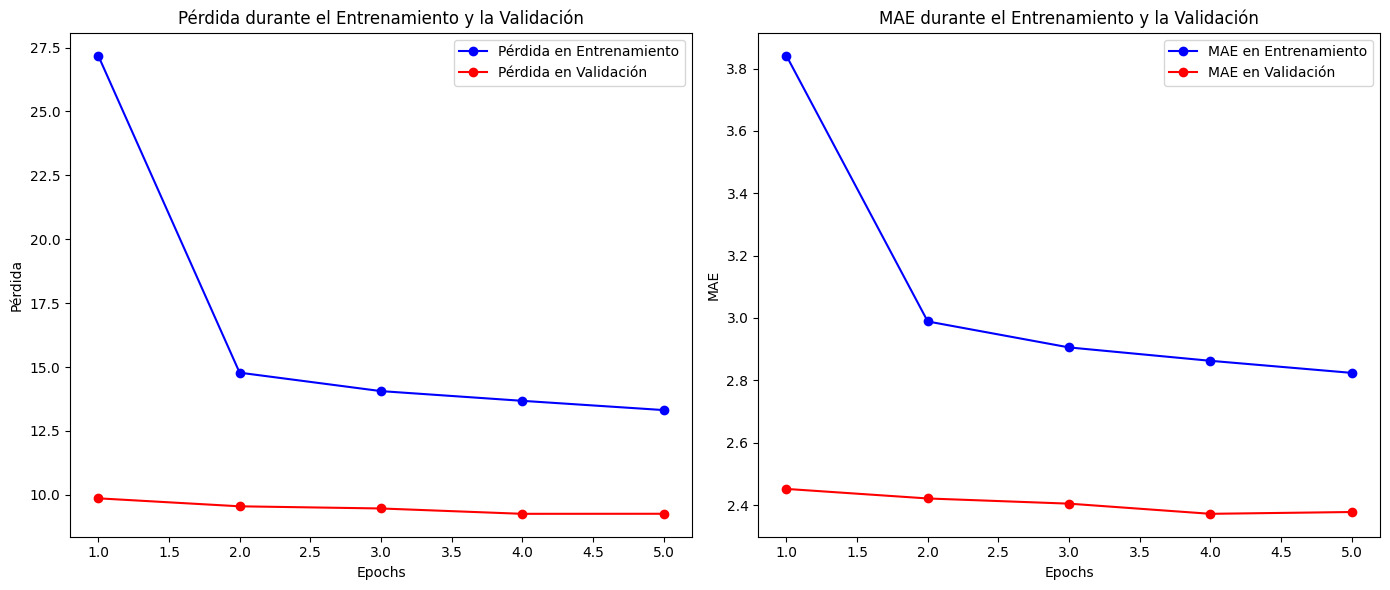

In [ ]:
import matplotlib.pyplot as plt

# Extraer los valores de pérdida y MAE del objeto history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Crear gráficas
plt.figure(figsize=(14, 6))

# Gráfica de la pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Pérdida en Entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento y la Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica del MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'bo-', label='MAE en Entrenamiento')
plt.plot(epochs, val_mae, 'ro-', label='MAE en Validación')
plt.title('MAE durante el Entrenamiento y la Validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

El MAE de entrenamiento muestra una tendencia descendente, mientras que el MAE de validación disminuye ligeramente y se mantiene relativamente estable. Este patrón sugiere que el modelo está aprendiendo de manera efectiva y que la capacidad de generalización está en línea con el aprendizaje obtenido de los datos de entrenamiento.

En ambos gráficos, el hecho de que las líneas de validación no aumenten con el tiempo es una señal positiva, ya que un aumento podría indicar un problema de sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento y pierde la capacidad de generalizar a datos nuevos.

Otro ejemplo pero utilizando el optimizador adam.

In [ ]:
# Definición del modelo usando la API funcional de Keras para mayor flexibilidad
inputs = Input(shape=(sequence_length, raw_data.shape[-1]))

# Capa LSTM con Dropout recurrente
# recurrent_dropout ayuda a prevenir el sobreajuste en las dependencias temporales de los datos
x = LSTM(64, recurrent_dropout=0.25, return_sequences=False)(inputs)

# Capa de Dropout: Ayuda a prevenir el sobreajuste reduciendo la dependencia en ciertas unidades
# "apagando" algunas de ellas aleatoriamente durante el entrenamiento
x = Dropout(0.5)(x)

# Capa de salida: Capa densa para la predicción final
outputs = Dense(1)(x)

# Construcción del modelo
model = Model(inputs, outputs)

# Callbacks: Se añade EarlyStopping junto con ModelCheckpoint
# ModelCheckpoint guarda el mejor modelo basado en la validación del loss
# EarlyStopping detiene el entrenamiento cuando el 'val_loss' deja de mejorar, previniendo sobreajuste
callbacks = [
    ModelCheckpoint("jena_lstm_dropout.keras", save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Añadido para detener el entrenamiento temprano
]

# Compilación del modelo
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entrenamiento del modelo
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset, callbacks=callbacks)
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/5
819/819 [==============================] - 427s 518ms/step - loss: 22.9236 - mae: 3.5225 - val_loss: 9.7618 - val_mae: 2.4377
Epoch 2/5
819/819 [==============================] - 398s 485ms/step - loss: 12.6584 - mae: 2.7692 - val_loss: 9.5524 - val_mae: 2.4066
Epoch 3/5
819/819 [==============================] - 397s 484ms/step - loss: 11.3148 - mae: 2.6111 - val_loss: 9.6326 - val_mae: 2.4111
Epoch 4/5
819/819 [==============================] - 394s 481ms/step - loss: 10.5452 - mae: 2.5170 - val_loss: 9.7801 - val_mae: 2.4409
Epoch 5/5
405/405 [==============================] - 46s 112ms/step - loss: 11.4097 - mae: 2.6635
Test MAE: 2.66


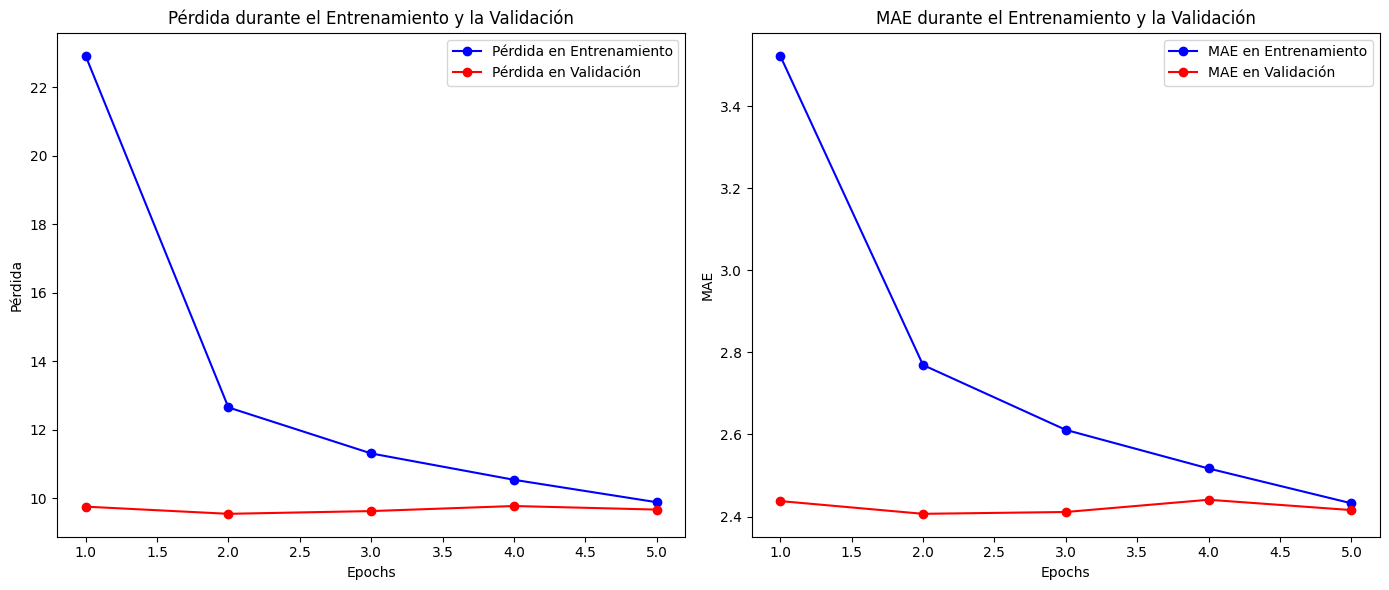

In [ ]:
# Extraer los valores de pérdida y MAE del objeto history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Crear gráficas
plt.figure(figsize=(14, 6))

# Gráfica de la pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Pérdida en Entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento y la Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica del MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'bo-', label='MAE en Entrenamiento')
plt.plot(epochs, val_mae, 'ro-', label='MAE en Validación')
plt.title('MAE durante el Entrenamiento y la Validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Ambos gráficos muestran una buena señal de que el modelo está aprendiendo adecuadamente y no hay una señal clara de sobreajuste, ya que las métricas de validación no empeoran a medida que las métricas de entrenamiento mejoran. En ambos casos, las métricas de validación son ligeramente mejores que las de entrenamiento y podría sugerir que los datos de validación podrían no ser representativos o que el modelo podría estar siendo demasiado penalizado durante el entrenamiento.

Otro ejemplo, realizando algunos cambios para obtener mejorías en el modelo.

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
# Para regularizar la capa Dense, también agregamos
# una capa Dropout después del LSTM.
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    callbacks=callbacks)
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/5
819/819 [==============================] - 210s 252ms/step - loss: 30.2776 - mae: 4.0313 - val_loss: 9.8970 - val_mae: 2.4442
Epoch 2/5
819/819 [==============================] - 217s 265ms/step - loss: 15.0205 - mae: 3.0101 - val_loss: 9.6839 - val_mae: 2.4157
Epoch 3/5
819/819 [==============================] - 216s 263ms/step - loss: 14.1785 - mae: 2.9190 - val_loss: 9.3502 - val_mae: 2.3737
Epoch 4/5
819/819 [==============================] - 225s 275ms/step - loss: 13.7091 - mae: 2.8702 - val_loss: 9.2598 - val_mae: 2.3564
Epoch 5/5
405/405 [==============================] - 33s 81ms/step - loss: 10.3381 - mae: 2.5495
Test MAE: 2.55


Como se ha mencionado anteriormente, de aumentar las epochs seguramente se obtendría un mejor resultado. Debido al gran tiempo que requeriría compilar estos modelos con unas 50 epochs, no sería rentable salvo que se redujera el dataset.

En ese caso, habría que aumentar las epochs bastante para poder reducir el MAE lo suficiente como para considerarse apto.

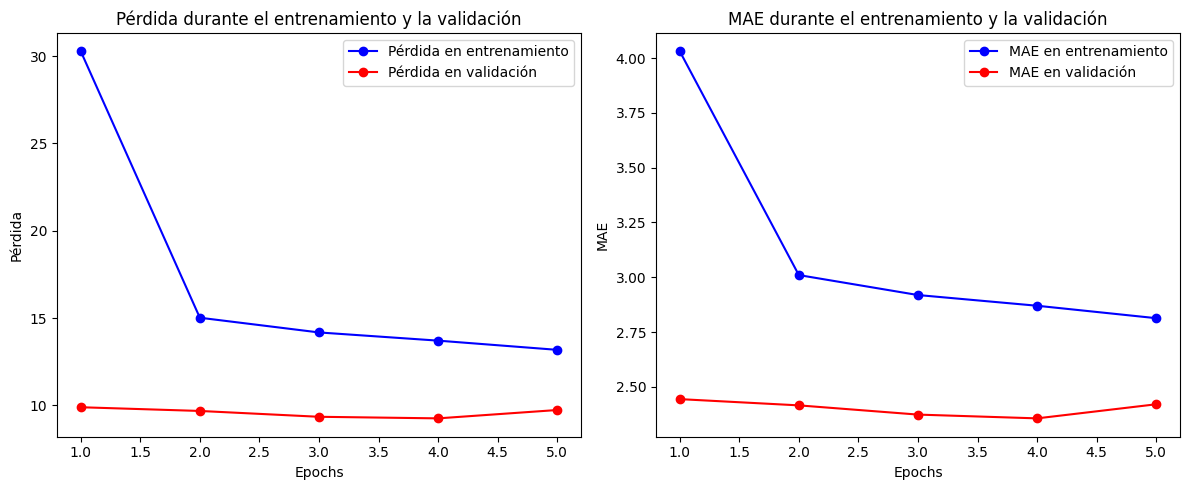

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y métricas del objeto history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Crear gráficas
plt.figure(figsize=(12, 5))

# Gráfica de la pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
# Gráfica del MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'bo-', label='MAE en entrenamiento')
plt.plot(epochs, val_mae, 'ro-', label='MAE en validación')
plt.title('MAE durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

En ambos gráficos, el hecho de que las métricas de validación no aumenten a medida que las de entrenamiento disminuyen es una señal positiva, lo que sugiere que no hay sobreajuste.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Definición del modelo usando la API funcional de Keras para mayor flexibilidad
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))

# Capa LSTM: Se mantiene igual pero se añade un comentario sobre recurrent_dropout
# recurrent_dropout ayuda a prevenir el sobreajuste en las dependencias temporales de los datos
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)

# Capa Dropout: Se mantiene igual, ayuda a prevenir el sobreajuste reduciendo la dependencia
# en ciertas unidades al "apagar" algunas de ellas aleatoriamente durante el entrenamiento
x = layers.Dropout(0.5)(x)

# Capa de salida: Se mantiene igual, una capa densa para la predicción final
outputs = layers.Dense(1)(x)

# Construcción del modelo: Se mantiene igual
model = keras.Model(inputs, outputs)

# Callbacks: Aquí se añade EarlyStopping junto con ModelCheckpoint
# ModelCheckpoint guarda el mejor modelo basado en la validación del loss
# EarlyStopping detiene el entrenamiento cuando el 'val_loss' deja de mejorar, previniendo sobreajuste
callbacks = [
    ModelCheckpoint("jena_lstm_dropout.keras", save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Añadido para detener el entrenamiento temprano
]

# Compilación del modelo: Se mantiene igual
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Entrenamiento del modelo: Se mantiene igual
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset, callbacks=callbacks)
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/5
819/819 [==============================] - 222s 267ms/step - loss: 29.2598 - mae: 3.9717 - val_loss: 9.7090 - val_mae: 2.4243
Epoch 2/5
819/819 [==============================] - 220s 268ms/step - loss: 14.5974 - mae: 2.9634 - val_loss: 9.2421 - val_mae: 2.3605
Epoch 3/5
819/819 [==============================] - 217s 265ms/step - loss: 13.6807 - mae: 2.8701 - val_loss: 9.0217 - val_mae: 2.3419
Epoch 4/5
819/819 [==============================] - 206s 251ms/step - loss: 13.1500 - mae: 2.8131 - val_loss: 9.0137 - val_mae: 2.3352
Epoch 5/5
405/405 [==============================] - 32s 78ms/step - loss: 10.2924 - mae: 2.5591
Test MAE: 2.56


Se obtiene un peor resultado del visto en clase, por lo que corrobora las conclusiones llegadas en los anteriores modelos.

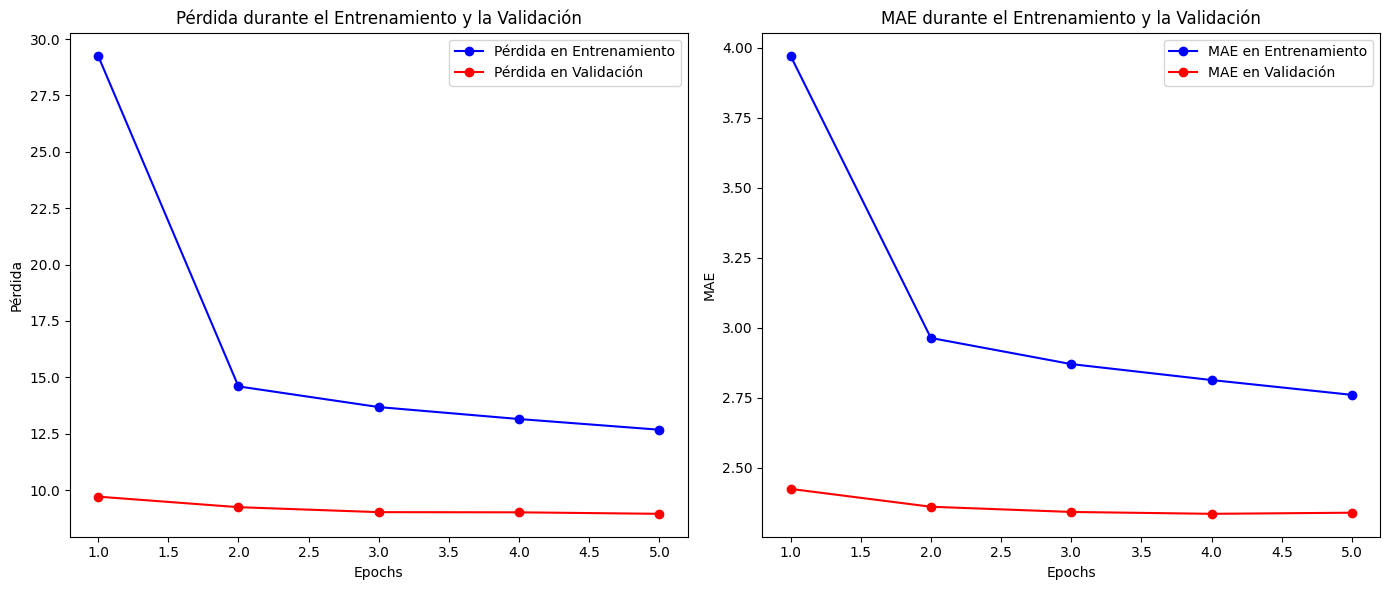

In [ ]:
import matplotlib.pyplot as plt

# Extraer los valores de pérdida y MAE del objeto history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_loss) + 1)

# Crear gráficas
plt.figure(figsize=(14, 6))

# Gráfica de la pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Pérdida en Entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento y la Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica del MAE de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(epochs, train_mae, 'bo-', label='MAE en Entrenamiento')
plt.plot(epochs, val_mae, 'ro-', label='MAE en Validación')
plt.title('MAE durante el Entrenamiento y la Validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


Ambos gráficos indican que el modelo tiene un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de validación, y no hay evidencia de sobreajuste, ya que la métrica de validación no empeora con respecto a la métrica de entrenamiento. La estabilidad en las métricas de validación sugiere que el modelo generaliza bien a nuevos datos. Es algo inusual y generalmente positivo que la pérdida y el MAE de validación sean consistentemente menores que las de entrenamiento

**Modelo LSTM apilado con dataset reducido**

Para tener un mejor enfoque de lo que podría ocurrir de reducir el dataset, se ha realizado un documento aparte llamado LSTM_EJERCICIOS en SofiaPenyaGonzalez/DEEP-LEARNING/LSTM_EJERCICIOS(1).ipynb:

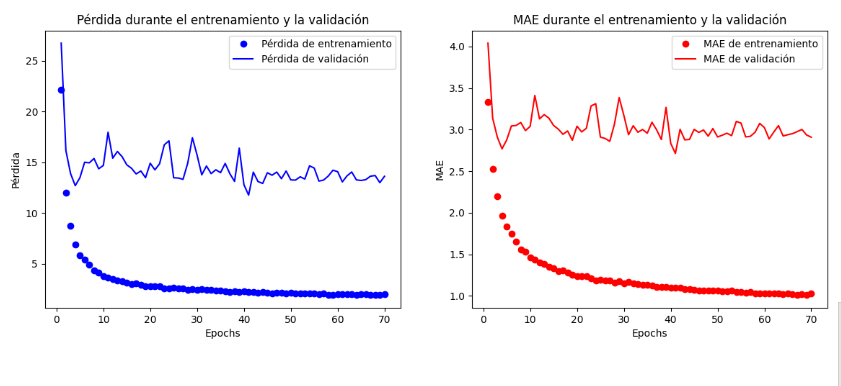

**Modelo GRU**

In [ ]:
input_shape = (sequence_length, raw_data.shape[-1])

# Definir el modelo
inputs = keras.Input(shape=input_shape)
x = layers.GRU(64, return_sequences=True,dropout=0.2, recurrent_dropout=0.2)(inputs)
x = layers.GRU(64,dropout=0.2, recurrent_dropout=0.2)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Compilar el modelo
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entrenar el modelo
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset)

# Evaluar el modelo en el conjunto de prueba
test_mae = model.evaluate(test_dataset)[1]
print(f"Test MAE: {test_mae:.2f}")

Epoch 1/5
819/819 [==============================] - 711s 860ms/step - loss: 19.4909 - mae: 3.2962 - val_loss: 9.2902 - val_mae: 2.3552
Epoch 2/5
819/819 [==============================] - 721s 880ms/step - loss: 12.1428 - mae: 2.7199 - val_loss: 9.0741 - val_mae: 2.3369
Epoch 3/5
819/819 [==============================] - 718s 876ms/step - loss: 11.1750 - mae: 2.6113 - val_loss: 9.5812 - val_mae: 2.3918
Epoch 4/5
819/819 [==============================] - 726s 886ms/step - loss: 10.1244 - mae: 2.4835 - val_loss: 10.3175 - val_mae: 2.4884
Epoch 5/5
405/405 [==============================] - 70s 173ms/step - loss: 11.8925 - mae: 2.7172
Test MAE: 2.72


El modelo GRU, supuestamente tendría que ser uno de los mejores modelos de todos los propuestos. Sin embargo, no mejora con respecto al visto en clase.


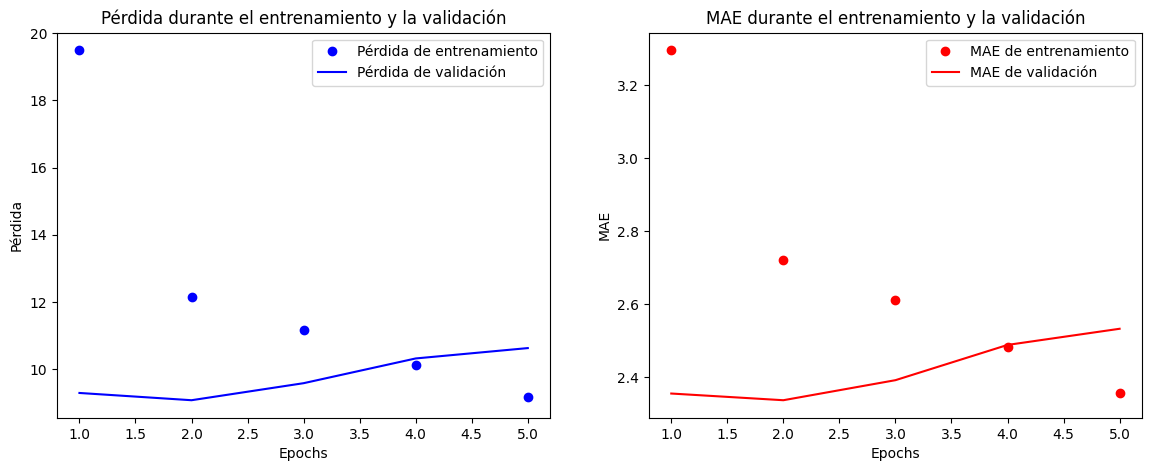

In [ ]:
# Extraer los valores de pérdida y MAE de la historia de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Gráfica de pérdida
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'ro', label='MAE de entrenamiento')
plt.plot(epochs, val_mae, 'r', label='MAE de validación')
plt.title('MAE durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

 Ambas series muestran una tendencia general a la baja, lo cual es típico durante el entrenamiento de un modelo, ya que se espera que el modelo mejore y reduzca su error a medida que aprende de los datos.

**Modelo Redes Neuronales Recurrentes bidireccionales**

Debido a los problemas con los tiempos de ejecución, no se ha podido realizar la comprobación de este modelo.

**CON RMSPROMP**

In [ ]:
# Definir el modelo
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(train_dataset, epochs=5, batch_size=64, validation_data=val_dataset)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(test_dataset)[1]
print(f"Test MAE: {test_mae:.2f}")

Epoch 1/5
819/819 [==============================] - 1216s 1s/step - loss: 10.6932 - mae: 2.4598 - val_loss: 10.7498 - val_mae: 2.5680
Epoch 2/5
819/819 [==============================] - 1219s 1s/step - loss: 3.9923 - mae: 1.5351 - val_loss: 12.9999 - val_mae: 2.8199
Epoch 3/5
744/819 [==========================>...] - ETA: 1:29 - loss: 2.3200 - mae: 1.1635

In [ ]:
# Extraer los valores de pérdida y MAE de la historia de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Gráfica de pérdida
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'ro', label='MAE de entrenamiento')
plt.plot(epochs, val_mae, 'r', label='MAE de validación')
plt.title('MAE durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

**ADAM**

In [ ]:
# Definir el modelo
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(train_dataset, epochs=5, batch_size=64, validation_data=val_dataset)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(test_dataset)[1]
print(f"Test MAE: {test_mae:.2f}")

In [ ]:
# Extraer los valores de pérdida y MAE de la historia de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Gráfica de pérdida
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'ro', label='MAE de entrenamiento')
plt.plot(epochs, val_mae, 'r', label='MAE de validación')
plt.title('MAE durante el entrenamiento y la validación')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

**CONCLUSIONES**

Realizamos los ejercicios con 5 épocas ya que se tratan de redes complejas en las que tarda mucho en ejecutar, aún así hemos podido concluir lo siguiente:

- El mejor modelo es el de apilar las  capas RNN LSTM con dropout y optimizador rmsprop (MAE: 2.54), mientras que el peor es el del modelo convolucional 1D (MAE: 3.36)
- A pesar de la pérdida de información que podría haber acarreado la reducción del dataset para todos los modelos, podría haber sido un buen ejercicio de entrenamiento y de práctica haberlo implementado.
- Con datos masivos, se ha visto que es necesario entrenar más de 5 epochs los modelos con diferentes parámetros propuestos. Sin embargo, debido al alto coste de tiempo a la hora de ejecutar, no es viable para un ordenador común en un entorno como Google Colab tratar con esta base de datos.



